# Titanic

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

In [3]:
training_set = pd.read_csv('TrainTitanic.csv')

In [4]:
training_set.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## Fucntions

In [72]:
def BarComapreSurvived(Column):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    sns.countplot(x=Column, data=training_set, ax=ax[0])
    ax[0].set_title(f'Count of {Column}')
    
    sns.countplot(x=Column, hue='Survived', data=training_set, ax=ax[1])
    ax[1].set_title(f'Count of {Column} by Survived')
    
    plt.show()

## EDA

In [6]:
training_set['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [7]:
training_set['Survived'].value_counts(normalize=True) * 100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

### Passenger Class

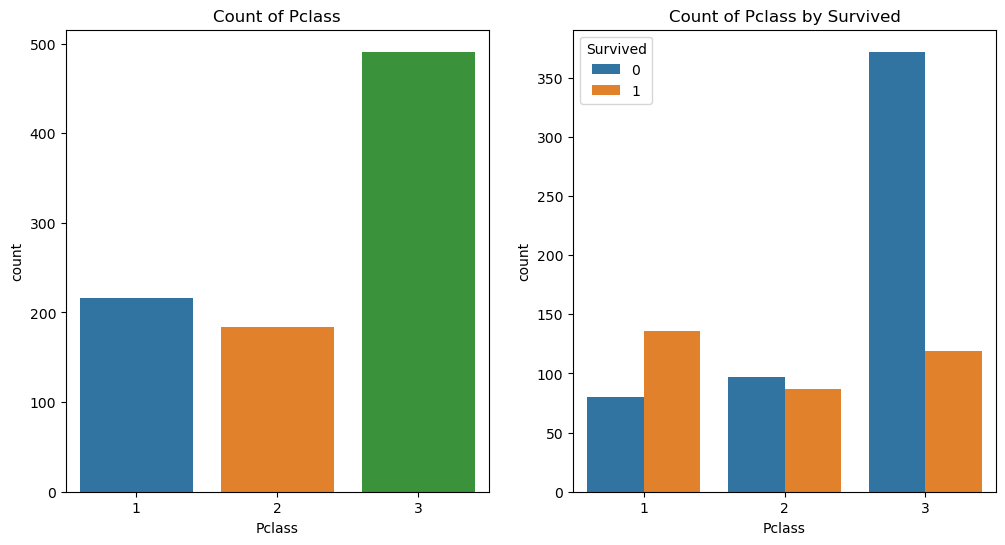

In [10]:
BarComapreSurvived('Pclass')

### Siblings 

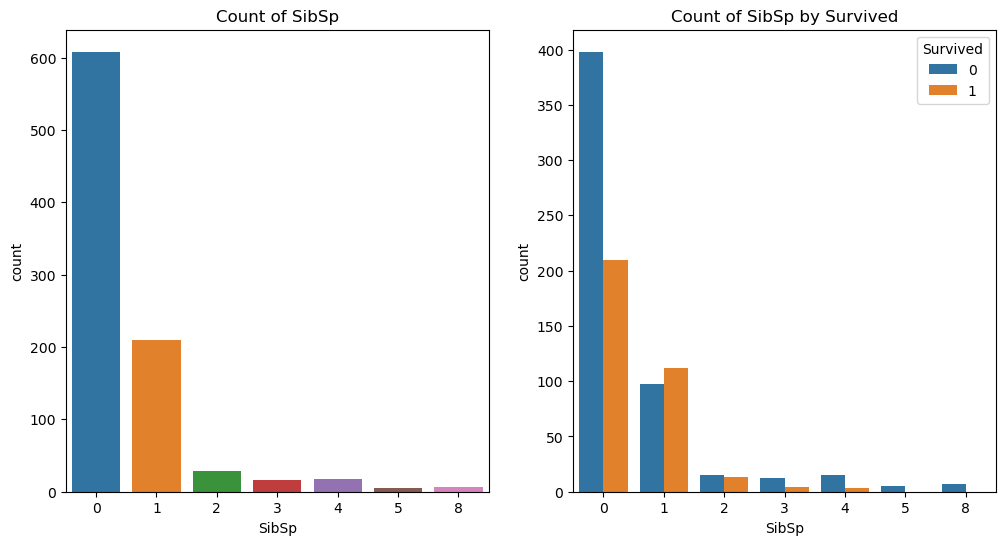

In [12]:
BarComapreSurvived('SibSp')

### Embarked

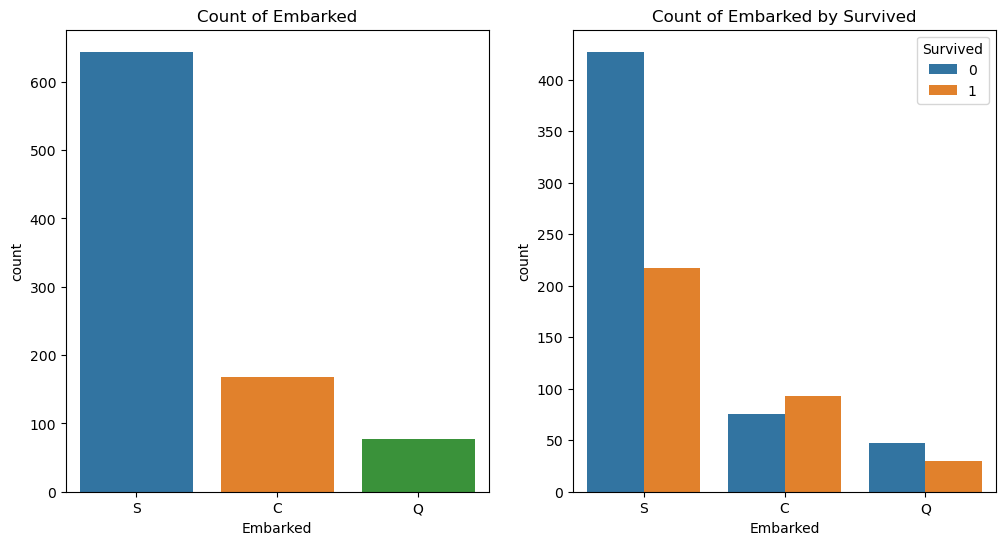

In [14]:
BarComapreSurvived('Embarked')

### Gender

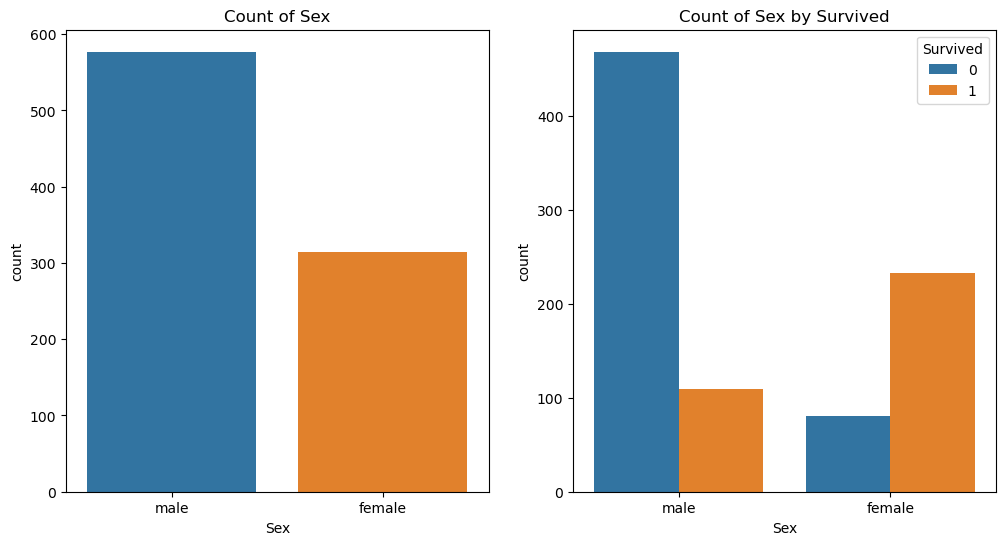

In [16]:
BarComapreSurvived('Sex')

### Age

<Axes: xlabel='Age', ylabel='count'>

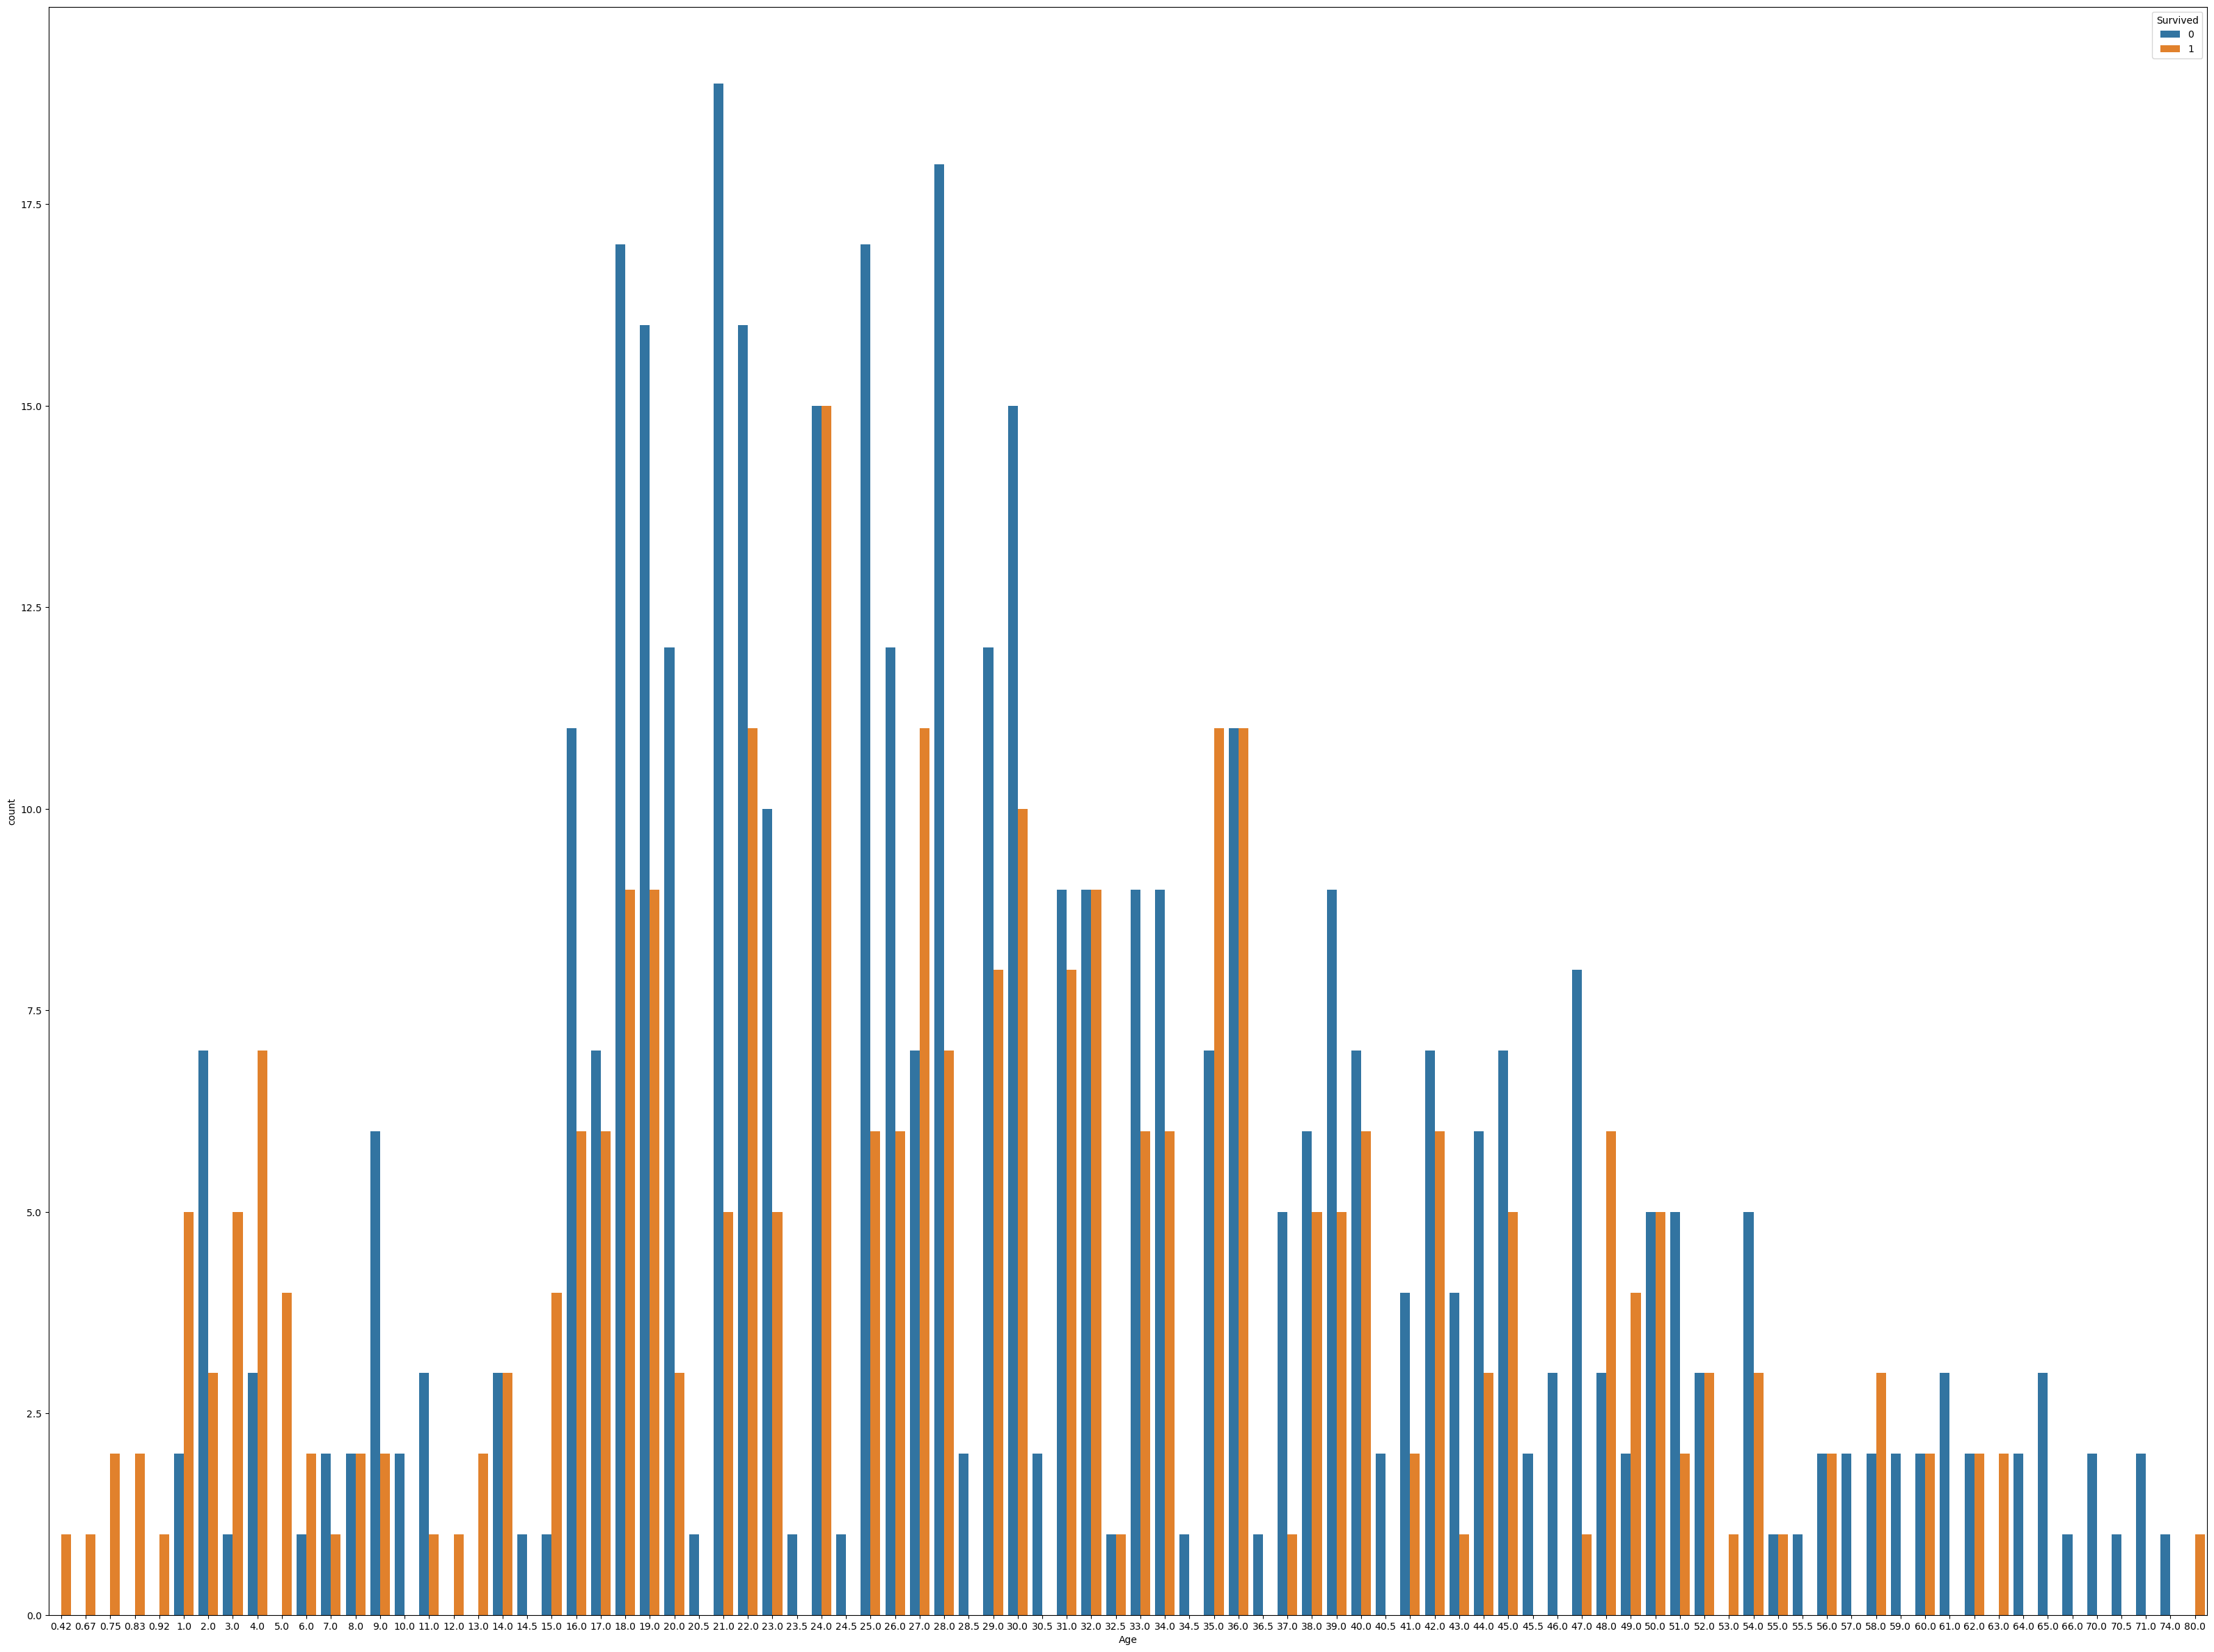

In [18]:
plt.figure(figsize=(40,30))
sns.countplot(x = 'Age', hue = 'Survived', data=training_set)

<Axes: >

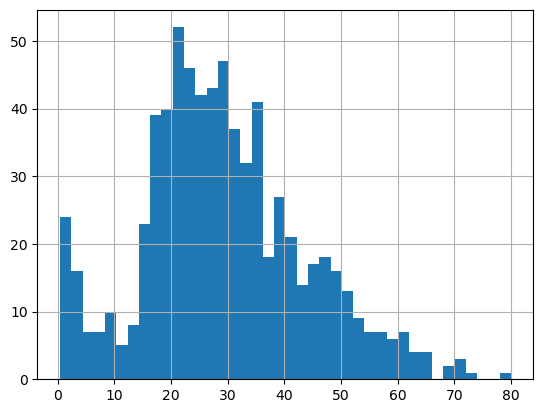

In [19]:
training_set['Age'].hist(bins = 40)

### Fare

<Axes: xlabel='Fare', ylabel='count'>

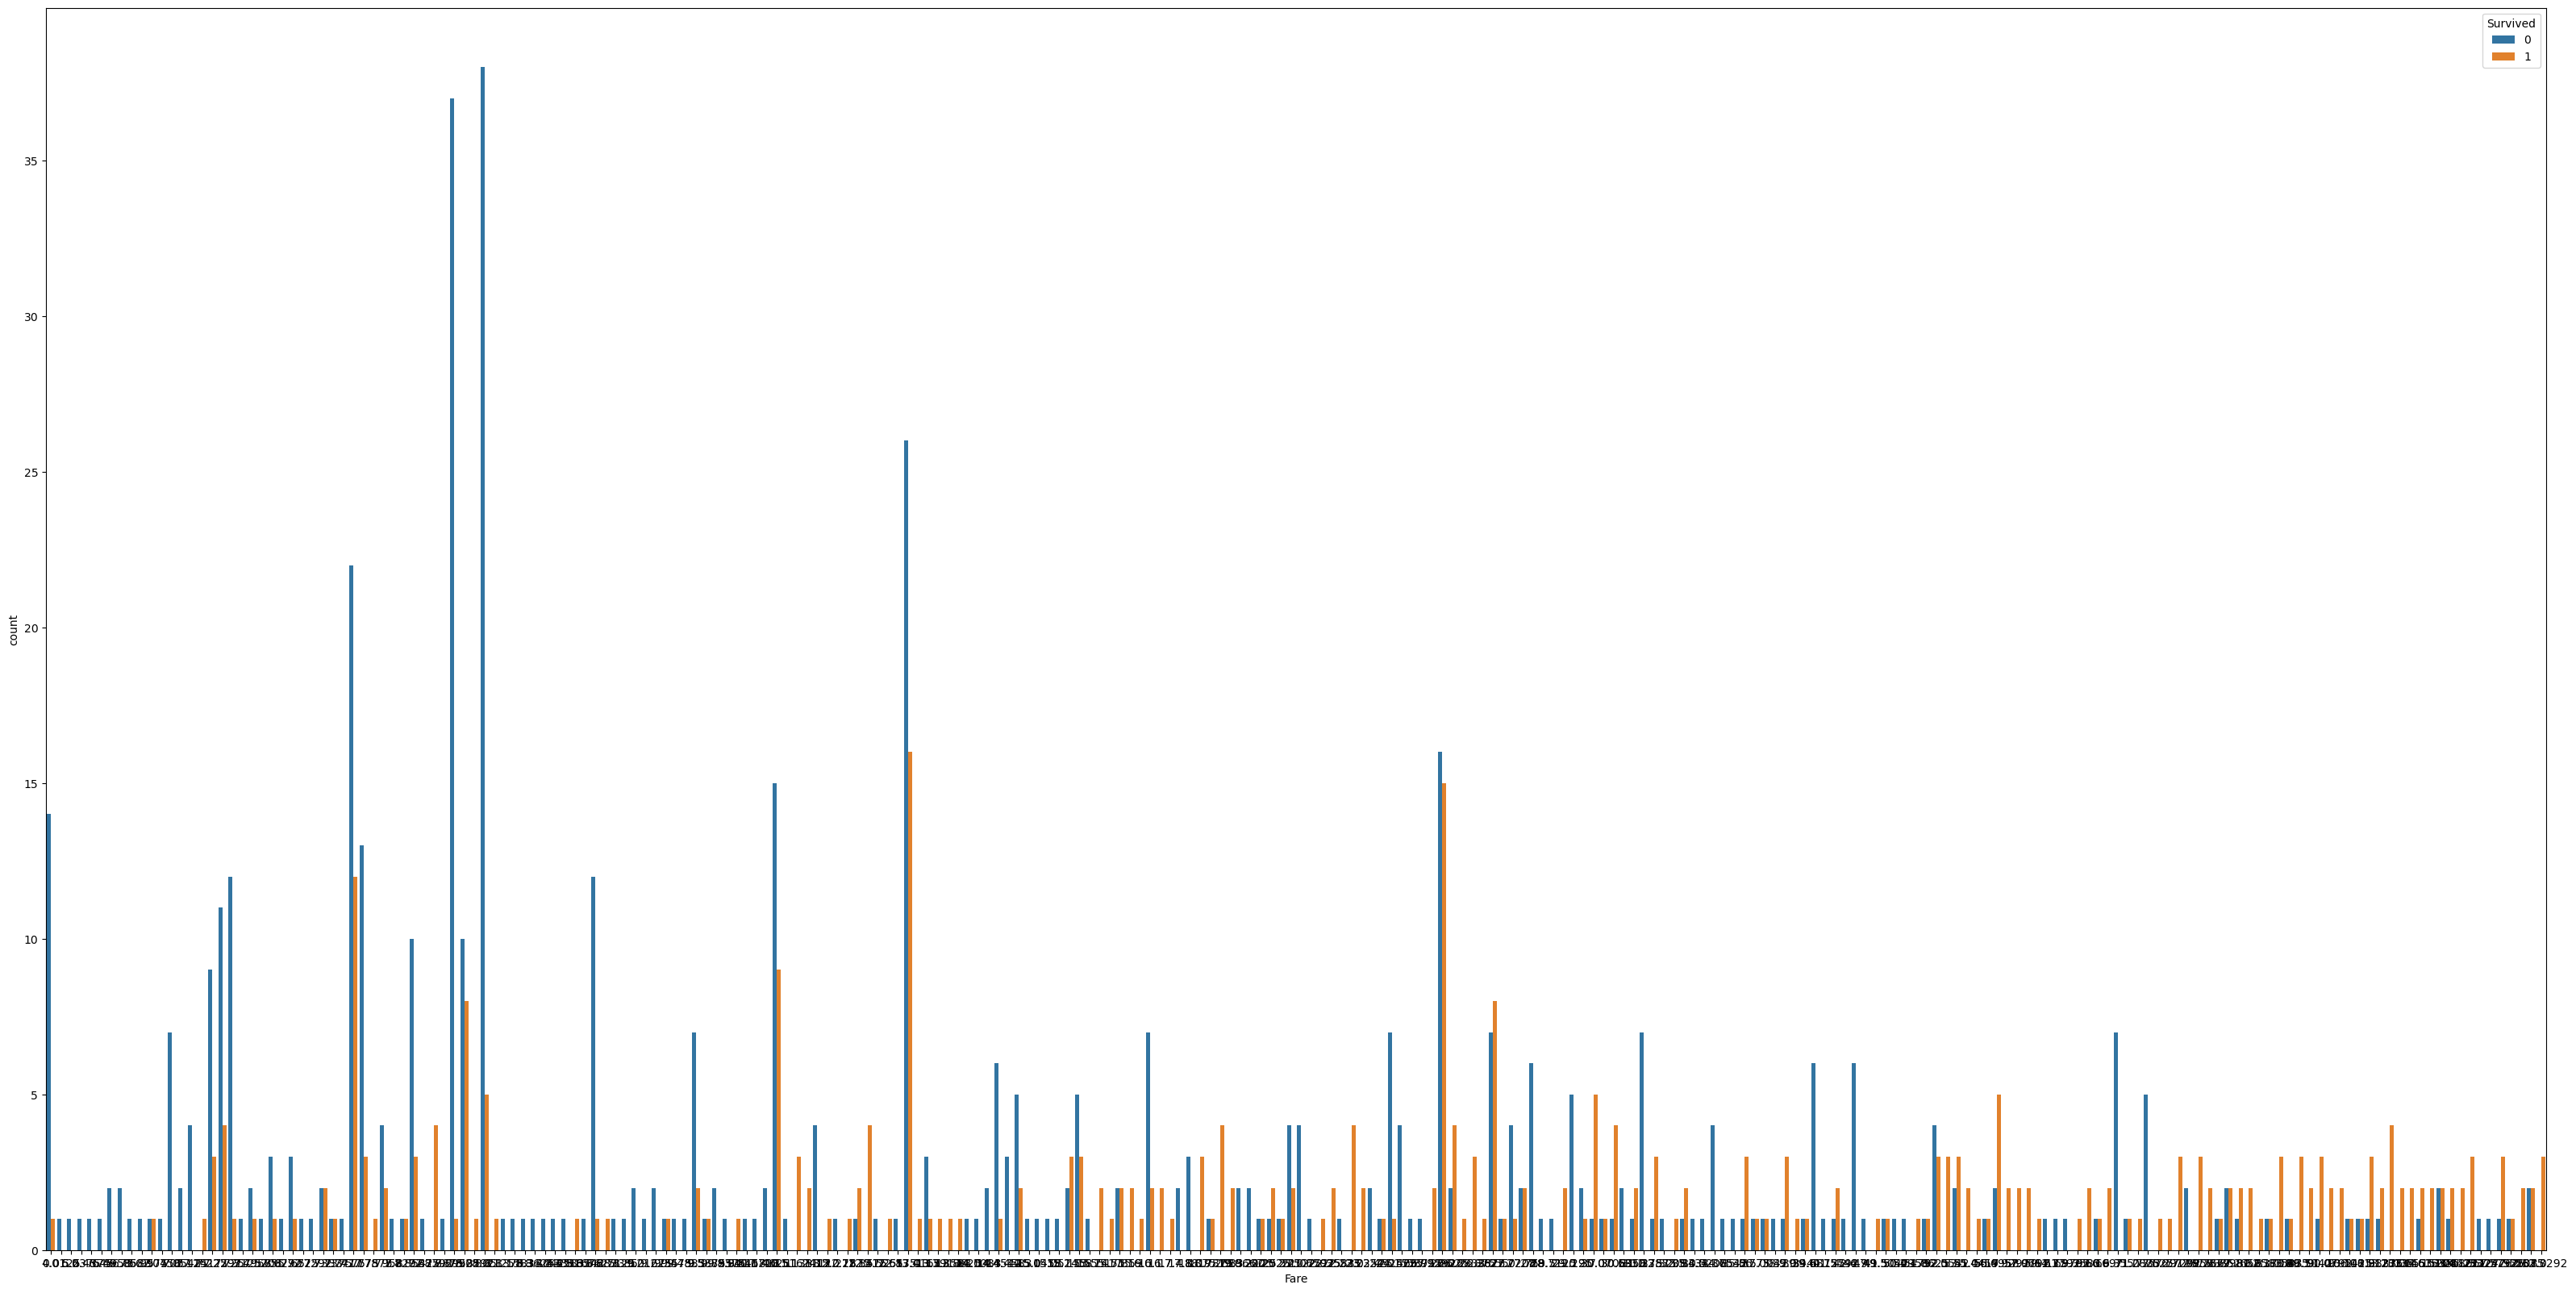

In [21]:
plt.figure(figsize=(40,20))
sns.countplot(x = 'Fare', hue = 'Survived', data=training_set)

<Axes: >

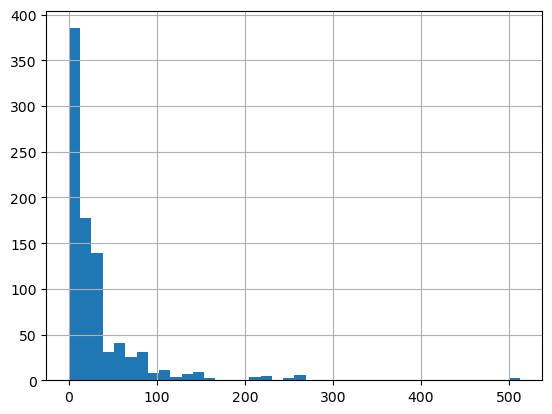

In [22]:
training_set['Fare'].hist(bins = 40)

## Clean data

<Axes: >

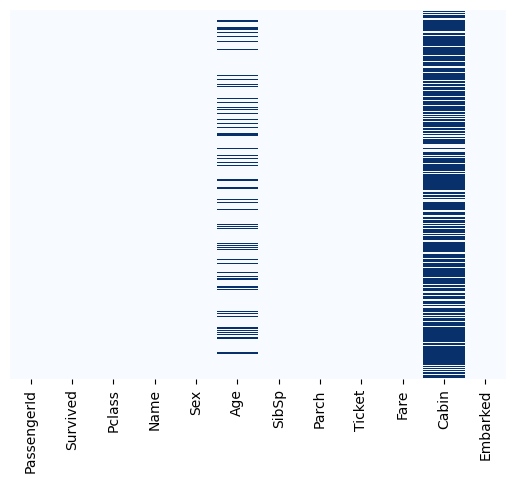

In [24]:
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap="Blues")

### Drop Columns

In [26]:
training_set.drop('Cabin',axis=1,inplace=False)
training_set.drop('Cabin',axis=1,inplace=True)

In [27]:
training_set.drop(['Name', 'Ticket', 'Embarked', 'PassengerId'],axis=1,inplace=True)

<Axes: >

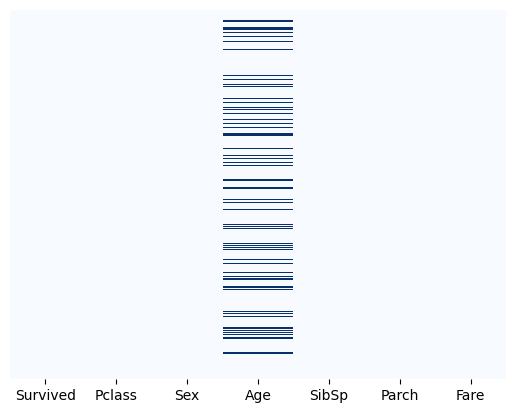

In [28]:
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap="Blues")

### Replace Missing Data for Age

In [30]:
GenderAgeMean = training_set.groupby('Sex')['Age'].mean()
training_set['Age'] = training_set['Age'].fillna(training_set['Sex'].map(GenderAgeMean))

<Axes: >

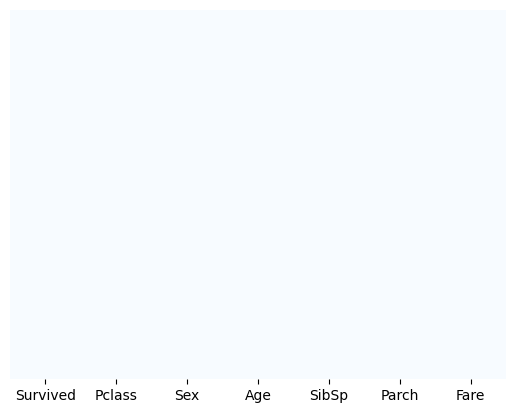

In [31]:
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap="Blues")

### Fixed Sex Coloumn 

In [33]:
training_set['Sex'] = training_set['Sex'].map({'male': 1, 'female': 0})

In [34]:
training_set = training_set.rename(columns={'Sex': 'Male'})

## Model Training

In [36]:
X = training_set.drop('Survived',axis=1).values
y = training_set['Survived'].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [38]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Model Training

In [40]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1])

<Axes: >

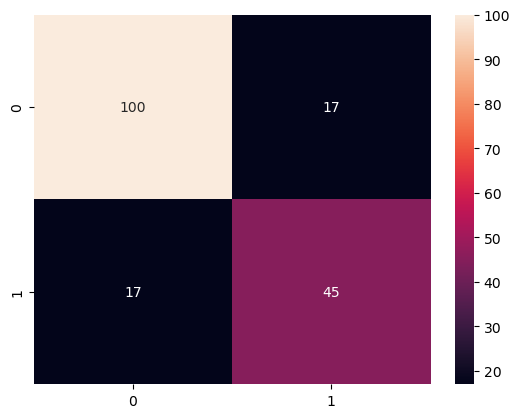

In [41]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [42]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.73      0.73      0.73        62

    accuracy                           0.81       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179

